# Employee Attrition Problem

Importing all neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data.csv')

In [3]:
df.shape

(1470, 38)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Primary Reason for Attrition,Secondary Reason for Attrition,Tertiary Reason for Attrition
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,Compensation,Work-life imbalance,Team Conflicts
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,NaN,NaN,NaN
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,Job profile,Work-life imbalance,Feeling undervalued
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,NaN,NaN,NaN
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,NaN,NaN,NaN


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Primary Reason for Attrition',
       'Secondary Reason for Attrition', 'Tertiary Reason for Attrition'],
      dtype='object')

Performing Exploratory Data Analysis

In [6]:
df.isnull().sum()

Age                                  0
Attrition                            0
BusinessTravel                       0
DailyRate                            0
Department                           0
DistanceFromHome                     0
Education                            0
EducationField                       0
EmployeeCount                        0
EmployeeNumber                       0
EnvironmentSatisfaction              0
Gender                               0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobRole                              0
JobSatisfaction                      0
MaritalStatus                        0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
Over18                               0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction 

In [7]:
# NAs or missing values for these three columns is - (1233/1470)*100 = 83.8%, hence will drop these three columns

In [8]:
df.drop(['Primary Reason for Attrition','Secondary Reason for Attrition','Tertiary Reason for Attrition'],axis=1,inplace=True)

In [9]:
df.shape

(1470, 35)

In [10]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [11]:
df[['EmployeeCount','Over18','StandardHours']]

,EmployeeCount,Over18,StandardHours
0,1,Y,80
1,1,Y,80
2,1,Y,80
3,1,Y,80
4,1,Y,80
...,...,...,...
1465,1,Y,80
1466,1,Y,80
1467,1,Y,80
1468,1,Y,80


In [12]:
#Since these columns have only 1 unique value for them, they don't act as a factor in the employee attrition hence we can drop these columns

In [13]:
df.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

In [14]:
df.shape

(1470, 32)

In [15]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [16]:
(237/1470)*100

16.122448979591837

In [17]:
#Since 'Yes' data points are 16% of the total data, there is an imbalance in the dataset which will lead to bias in model

In [18]:
#Checking for duplicate values in the data
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [19]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


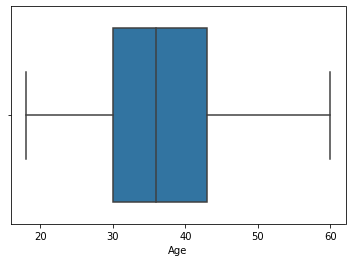

In [20]:
sns.boxplot(df['Age'])

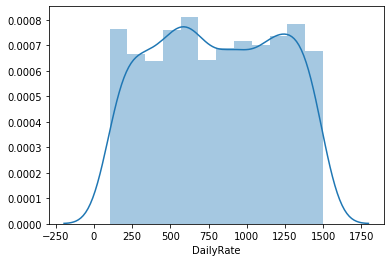

In [21]:
sns.distplot(df['DailyRate'])

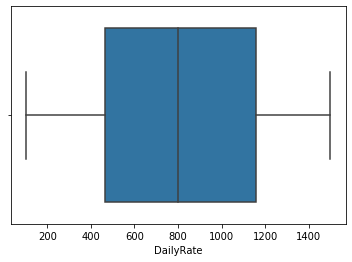

In [22]:
sns.boxplot(df['DailyRate'])

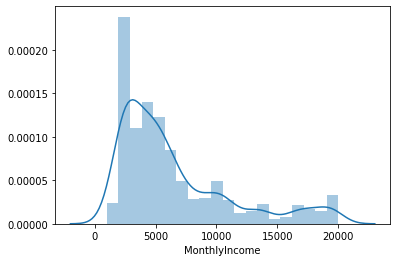

In [23]:
sns.distplot(df['MonthlyIncome'])
#Rightly Skewed

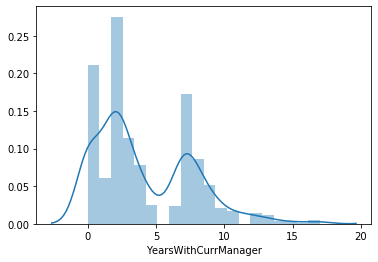

In [24]:
sns.distplot(df['YearsWithCurrManager'])

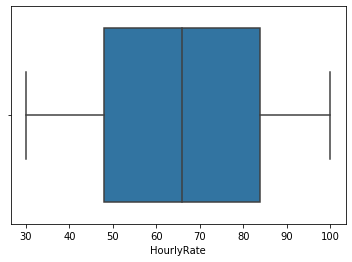

In [25]:
sns.boxplot(df['HourlyRate'])

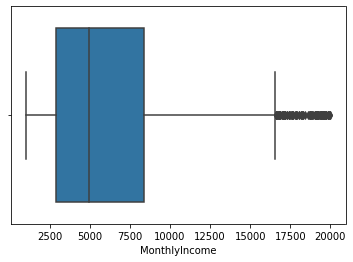

In [26]:
sns.boxplot(df['MonthlyIncome'])

In [27]:
Q1 = np.quantile(df['MonthlyIncome'], [0.25])
Q3 = np.quantile(df['MonthlyIncome'], [0.75])
IQR = Q3 - Q1

In [28]:
Outliers = Q3+ 1.5*IQR

In [29]:
Outliers

array([16581.])

In [30]:
df[df.MonthlyIncome>16581]['Attrition'].value_counts()
#Checking attrition for employees with an income which falls in the outlier range, getting a general idea of impact of income on attrition

No     109
Yes      5
Name: Attrition, dtype: int64

In [31]:
df['LogMonthlyIncome'] = np.log(df['MonthlyIncome'])
#Created new column for monthly income (by appltying log transform on Monthly income to deal with outliers)

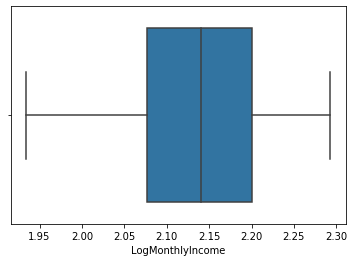

In [32]:
sns.boxplot(np.log(df['LogMonthlyIncome']))

In [33]:
df.drop(['MonthlyIncome'],axis =1, inplace = True)

In [34]:
df.drop(['EmployeeNumber'],axis =1, inplace = True)

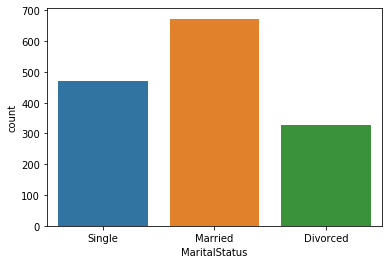

In [35]:
sns.countplot(df['MaritalStatus'])
#Majority employees in given data are married

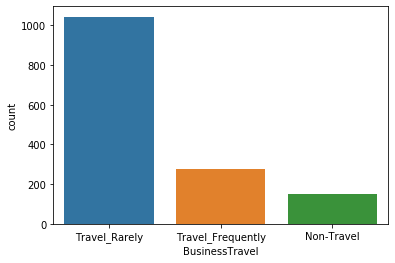

In [36]:
sns.countplot(df['BusinessTravel'])
#Majority employees in given data travel rarely

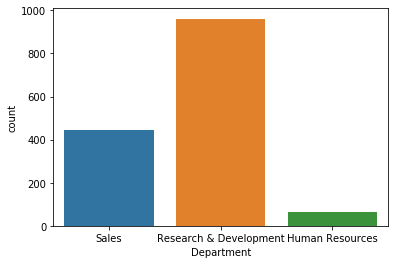

In [37]:
sns.countplot(df['Department'])
#Majority employees in given data are from R&D dept

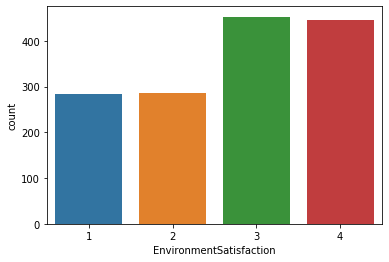

In [38]:
sns.countplot(df['EnvironmentSatisfaction'])
##Majority employees are satisfied with job (Data is baised hence this finding)

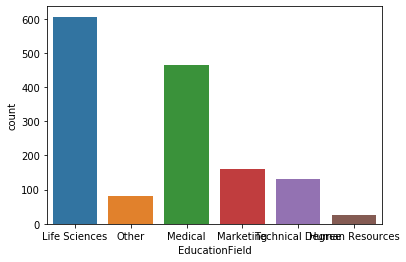

In [39]:
sns.countplot(df['EducationField'])
#Majoirty employees are from life sciences field

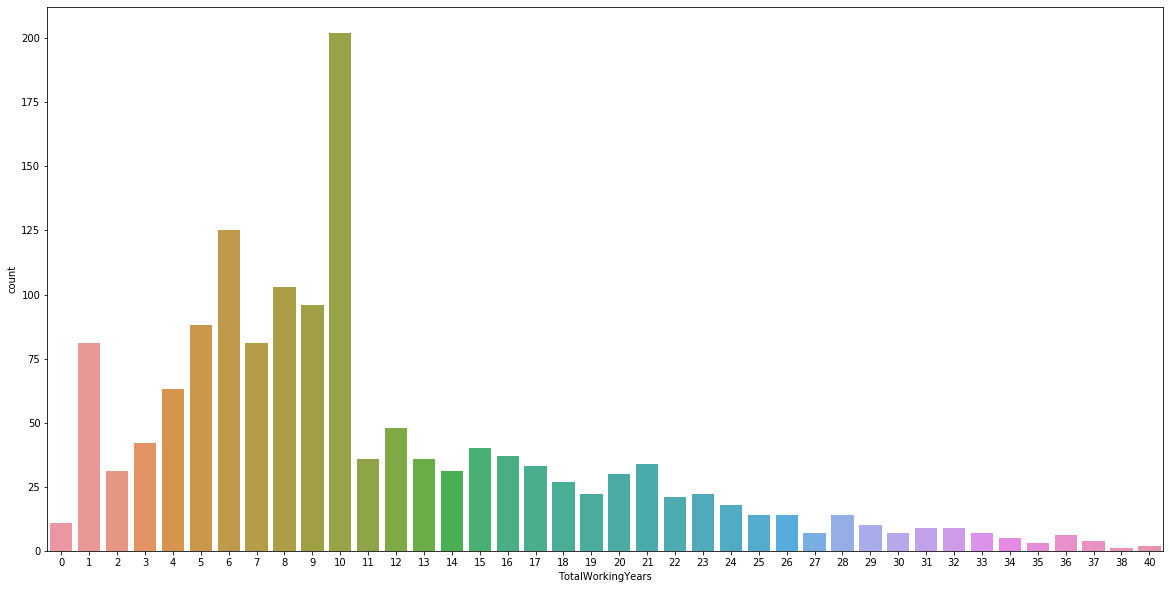

In [40]:
plt.subplots(figsize=(20,10))
sns.countplot(df['TotalWorkingYears'])
#Majoirty employees have 10 working years
#Skeweness in this data

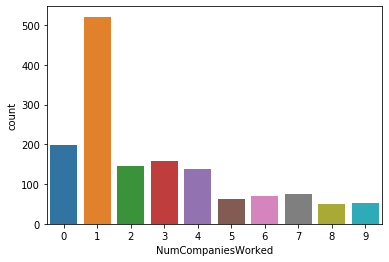

In [41]:
sns.countplot(df['NumCompaniesWorked'])
#Most employees have worked in one company previously

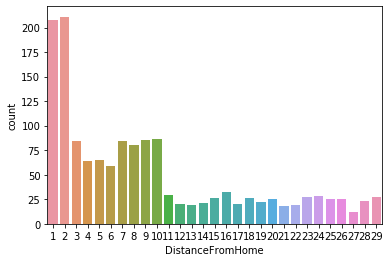

In [42]:
sns.countplot(df['DistanceFromHome'])
#Majority employees have the office at a distance of 1 or 2 from their home

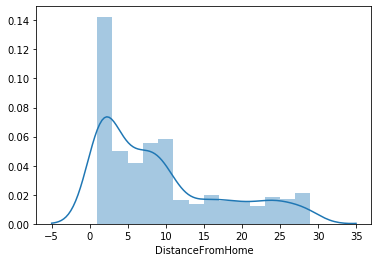

In [43]:
sns.distplot(df['DistanceFromHome'])
#Skeweness

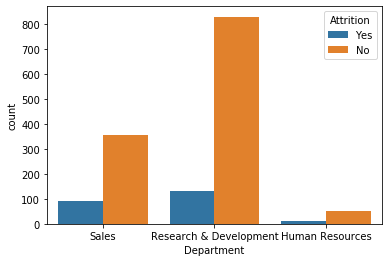

In [44]:
sns.countplot(data = df,
                  x = "Department",
                  hue = "Attrition")

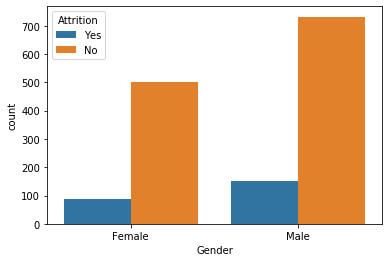

In [45]:
sns.countplot(data = df,
             x = "Gender",
             hue = "Attrition")

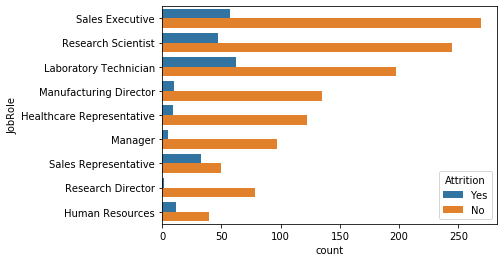

In [46]:
sns.countplot(data = df,
            y = "JobRole",
            hue = "Attrition")

Feature Engineering

In [47]:
df['AgeBins'] = pd.qcut(df['Age'], [0,0.25,0.50,0.75,1.0], labels= ['Young Adults','Adults','Middle Aged','Senior Aged']).astype(object)

In [48]:
df['DistanceBins'] = pd.qcut(df['DistanceFromHome'], [0,0.25,0.50,0.75,1.0], labels= ['Nearby','A little away','Far off','Very far off']).astype(object)

In [49]:
df['ExperianceBins'] = pd.cut(df['TotalWorkingYears'], [0,2,5,10,15,40], labels = ['Fresher','Senior','Lead','Manager','VP']).astype(object)

In [50]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'LogMonthlyIncome', 'AgeBins', 'DistanceBins',
       'ExperianceBins'],
      dtype='object')

In [51]:
#Using one hot encoding
df = pd.get_dummies(df , columns = ['BusinessTravel', 'Department',
         'EducationField',
       'EnvironmentSatisfaction', 'Gender',
        'JobRole', 'MaritalStatus',
         'OverTime','AgeBins', 'DistanceBins',
       'ExperianceBins'],drop_first=False)

In [57]:
df= pd.get_dummies(df , columns = ['Attrition'],drop_first=False)

Feature Selection

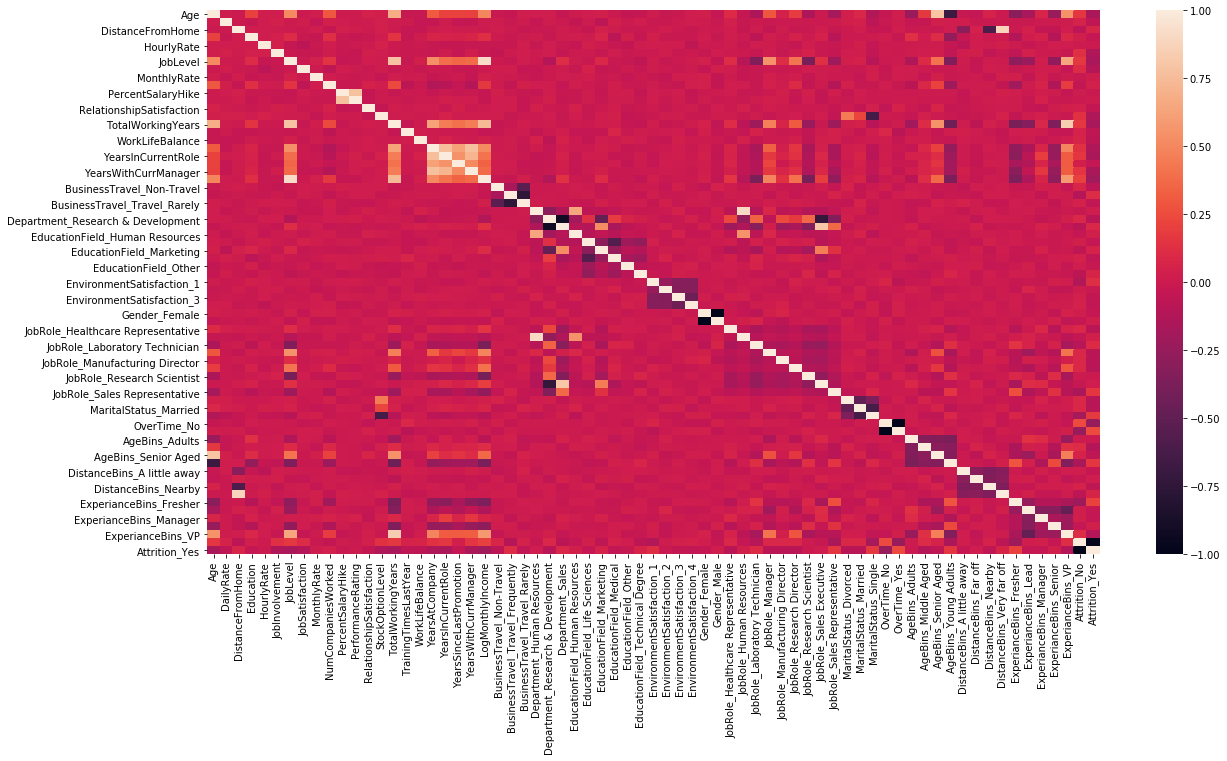

In [58]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr())

In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [60]:
kbest = SelectKBest(score_func = chi2 , k='all')

In [62]:
df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'LogMonthlyIncome', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EnvironmentSatisfaction_1',
       'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3',
       'EnvironmentSatisfaction_4

In [65]:
x = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'LogMonthlyIncome', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EnvironmentSatisfaction_1',
       'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3',
       'EnvironmentSatisfaction_4', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No',
       'OverTime_Yes', 'AgeBins_Adults', 'AgeBins_Middle Aged',
       'AgeBins_Senior Aged', 'AgeBins_Young Adults',
       'DistanceBins_A little away', 'DistanceBins_Far off',
       'DistanceBins_Nearby', 'DistanceBins_Very far off',
       'ExperianceBins_Fresher', 'ExperianceBins_Lead',
       'ExperianceBins_Manager', 'ExperianceBins_Senior', 'ExperianceBins_VP']]
y = df['Attrition_Yes']

In [67]:
fitted = kbest.fit(x,y)
op = pd.DataFrame({'Features':x.columns, 'Feature_Imp':fitted.scores_}).sort_values('Feature_Imp',ascending = False).set_index('Features')

In [78]:
op.head(20)

,Feature_Imp
Features,
MonthlyRate,1196.633553
DailyRate,956.580494
TotalWorkingYears,230.721618
YearsAtCompany,142.100054
YearsInCurrentRole,117.522596
YearsWithCurrManager,110.671534
Age,84.155277
OverTime_Yes,63.845067
DistanceFromHome,63.772142


In [79]:
x1 = df[['MonthlyRate',
'DailyRate',
'TotalWorkingYears',
'YearsAtCompany',
'YearsInCurrentRole',
'YearsWithCurrManager',
'Age',
'OverTime_Yes',
'DistanceFromHome',
'ExperianceBins_Fresher',
'JobRole_Sales Representative',
'MaritalStatus_Single',
'AgeBins_Young Adults',
'StockOptionLevel',
'OverTime_No']]

Model Building

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train ,x_test, y_train , y_test = train_test_split(x1,y,test_size = 0.3)

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [84]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [91]:
valid_pred = model.predict(x_test)  
train_pred = model.predict(x_train)
train_score = accuracy_score(train_pred,y_train)

In [92]:
train_score

1.0

In [93]:
round(accuracy_score(valid_pred,y_test),2)

0.77

In [95]:
round(f1_score(valid_pred,y_test),2)

0.24

In [98]:
round(precision_score(valid_pred,y_test),2)

0.23

In [100]:
round(recall_score(valid_pred,y_test),2)

0.25

In [101]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
valid_pred2 = rf.predict(x_test)
train_pred2 = rf.predict(x_train)
train_score2 = accuracy_score(train_pred2,y_train)

In [102]:
train_score2

1.0

In [103]:
round(accuracy_score(valid_pred2,y_test),2)

0.87

In [104]:
round(f1_score(valid_pred2,y_test),2)

0.32

In [105]:
round(precision_score(valid_pred2,y_test),2)

0.2

In [106]:
round(recall_score(valid_pred2,y_test),2)

0.78

In [110]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
valid_pred3 = log.predict(x_test) 
train_pred3 = log.predict(x_train)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [111]:
train_score3 = accuracy_score(train_pred3,y_train)

In [112]:
train_score3

0.8377065111758989

In [115]:
round(accuracy_score(valid_pred3,y_test),2)

0.85

In [116]:
round(f1_score(valid_pred3,y_test),2)

0.03

In [117]:
round(precision_score(valid_pred3,y_test),2)

0.01

In [118]:
round(recall_score(valid_pred3,y_test),2)

1.0

Conculsion: Random Forest is the model giving the best Performance for the given data, hence we go with Random forest as our model of choice